# 股票回归分析：
1、数据可视化
2、特定股和上证综指每日收益率
3、两个每日收益率之间的线性回归方程

In [1]:
#-*- coding: utf-8 -*-

#601606
#600519

import pandas as pd
import tushare as ts
from pandas import DataFrame
import matplotlib.pyplot as plt
import datetime

In [2]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['simhei']

In [3]:
ziti = matplotlib.font_manager.FontProperties(fname='/Users/cdd/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf')

In [4]:
index = ts.get_hist_data('000001', start = '2020-01-01', end = '2020-06-01')
index.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-06-01,13.10,13.39,13.32,13.08,882960.56,0.32,2.46,13.086,13.158,13.404,636140.90,629064.44,693356.05
2020-05-29,13.01,13.04,13.00,12.92,457808.25,-0.07,-0.54,13.014,13.146,13.439,541582.95,604489.24,704644.14
2020-05-28,12.87,13.18,13.07,12.81,960760.31,0.29,2.27,12.998,13.169,13.465,621268.78,634387.86,720331.94
2020-05-27,13.05,13.19,13.00,12.96,482962.97,-0.04,-0.31,13.064,13.192,13.486,539579.11,632779.04,719135.42
2020-05-26,13.02,13.07,13.04,12.94,396212.41,0.08,0.62,13.166,13.255,13.498,581156.73,648518.62,723287.35


In [5]:
maotai = ts.get_hist_data('688085', start = '2020-01-01', end = '2020-06-01')
maotai.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-06-01,63.08,68.88,65.00,61.50,27259.19,1.87,2.96,64.132,65.158,61.147,27951.34,31567.25,34460.50
2020-05-29,59.60,66.60,63.13,58.68,34654.93,3.53,5.92,64.176,65.008,60.323,26713.93,32269.36,35419.71
2020-05-28,64.01,64.59,59.60,58.10,33682.60,-5.15,-7.95,64.648,65.280,59.485,28242.53,32298.16,35712.16
2020-05-27,68.50,68.79,64.75,63.92,21287.01,-3.43,-5.03,66.850,65.861,58.800,30469.95,33852.83,35538.83
2020-05-26,65.25,69.30,68.18,64.35,22872.95,2.96,4.54,66.880,66.116,57.885,31943.52,39651.89,36884.69


In [6]:
index.to_csv('index.csv')
maotai.to_csv('maotai.csv')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


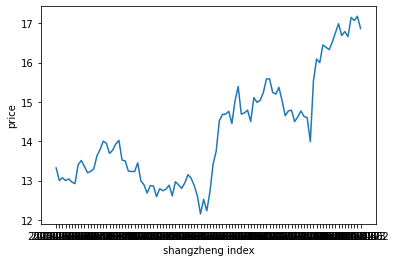

In [7]:
plt.plot(index['close'])
plt.xlabel('shangzheng index')
plt.ylabel('price')
plt.show()

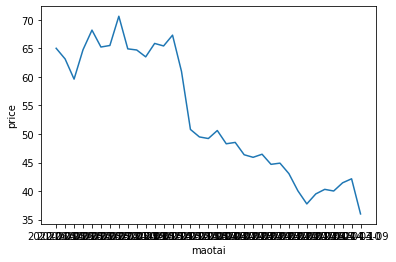

In [8]:
plt.plot(maotai['close'])
plt.xlabel('maotai')
plt.ylabel('price')
plt.show()

In [9]:
stock = pd.merge(index,maotai,left_index=True, right_index = True) 
stock = stock[['close_x','close_y']]
stock.columns = ['Shangzheng Index','maotai']
stock[:10]

,Shangzheng Index,maotai
date,,
2020-06-01,13.32,65.00
2020-05-29,13.00,63.13
2020-05-28,13.07,59.60
2020-05-27,13.00,64.75
2020-05-26,13.04,68.18
2020-05-25,12.96,65.22
2020-05-22,12.92,65.49
2020-05-21,13.40,70.61
2020-05-20,13.51,64.90


In [10]:
daily_return = (stock.diff()/stock.shift(periods = 1)).dropna()
daily_return[:10]

,Shangzheng Index,maotai
date,,
2020-05-29,-0.024024,-0.028769
2020-05-28,0.005385,-0.055916
2020-05-27,-0.005356,0.086409
2020-05-26,0.003077,0.052973
2020-05-25,-0.006135,-0.043414
2020-05-22,-0.003086,0.004140
2020-05-21,0.037152,0.078180
2020-05-20,0.008209,-0.080867
2020-05-19,-0.011103,-0.003082


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


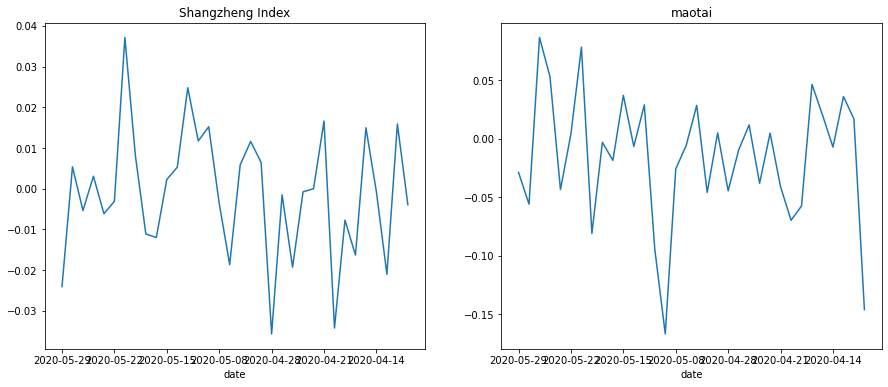

In [11]:

fig,ax = plt.subplots(1,2,figsize=(15,6))

daily_return['Shangzheng Index'].plot(ax=ax[0])
ax[0].set_title('Shangzheng Index')

daily_return['maotai'].plot(ax=ax[1])
ax[1].set_title('maotai')

plt.show()

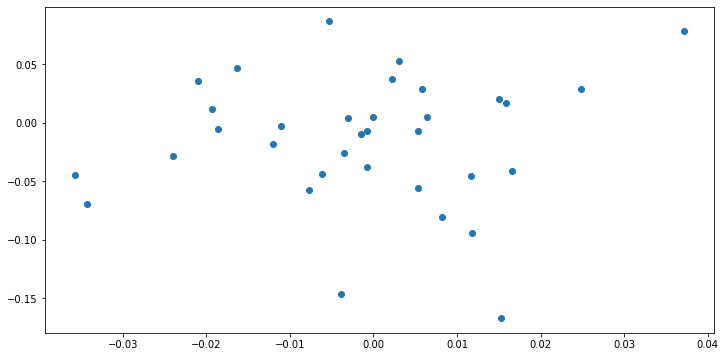

In [12]:
fig.axs = plt.subplots(1,1,figsize=(12,6))
plt.scatter(daily_return['Shangzheng Index'],daily_return['maotai'])

In [13]:
#回归
import statsmodels.api as sm
daily_return['intercept']=1.0
model = sm.OLS(daily_return['maotai'],daily_return[['Shangzheng Index','intercept']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 maotai   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.2143
Date:                Thu, 18 Jun 2020   Prob (F-statistic):              0.647
Time:                        02:52:00   Log-Likelihood:                 50.562
No. Observations:                  34   AIC:                            -97.12
Df Residuals:                      32   BIC:                            -94.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Shangzheng Index     0.2865      0.619  